# <center> Practice Case 4
## <center> Machine Learning: Making a Prediction for Flight Delay
    
    
Here in this notebook, I would like to analyze the dataset of malaysian flights from October 2018 until November 2018. Out of this dataset, a machine learning model will be built and trained and then used to predict flight delays for the next month (December 2018).

    Author: Tri Juliansyah Muharam Sambas
    Date: 4th November 2019

## Outline
- Import Libraries
- Import Dataset
- Data Cleaning
    * Missing values
    * Duplicate entries
- Data Preparation
    * Feature Engineering
- Exploratory Data Analysis
- Modeling & Evaluation
    * Linear Regression
    * Logistic Regression
    * XGBoost Model
- Conclusion

## TLDR; Executive Summary
1. **Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph.**  
![Suggestion 1](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/time.PNG?raw=true)
![Suggestion 2](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/days.PNG?raw=true)
![Suggestion 3](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/Picture1.png?raw=true)

2. **Create a model to estimate the delay duration ( Linear Regression )**
3. **Create a model to predict delay > 60 min ( Logistic regression and another supervised model you choosing )**
4. **Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created**
5. **Using those models predict delay that will happened in December for delay >60**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset
### Training

In [2]:
flight_df = pd.read_csv('../Data/training_dataset.csv')
flight_df.head(3)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8


In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

### Test

In [4]:
test_df = pd.read_csv('../Data/test_dataset.csv')
test_df.head(3)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 26 columns):
id                            41557 non-null int64
number                        41557 non-null object
airline                       41557 non-null object
airline_name                  41557 non-null object
scheduled_departure_time      41557 non-null object
scheduled_arrival_time        41555 non-null object
departure_airport_city        41557 non-null object
departure_airport_code        41557 non-null object
departure_airport_country     41557 non-null object
departure_airport_gate        25147 non-null object
departure_airport_name        41557 non-null object
departure_airport_region      41557 non-null object
departure_airport_terminal    26309 non-null object
departure_airport_timezone    41557 non-null object
arrival_airport_city          41557 non-null object
arrival_airport_code          41557 non-null object
arrival_airport_country       41557 non-null object
arrival_

### Merging Training-Test

In [6]:
flight_df = pd.concat([flight_df,test_df], axis = 0)

### Dataset Quick Review

From this quick review, I found that **not all the categorical variables supposedly being categorical**. This insight come from the fact that the unique number is far too many to be grouped as categories and some of them are supposed to be numerical. For example, **flight duration** is presented in hour and minutes while it could also be transformed to fully numerical (in hours or minutes) and **departure and arrival time** could also be manipulated as datetime type of variable so that one could analyze it specifically based on clock time.

In [7]:
categorical = list(flight_df.dtypes[flight_df.dtypes == 'object'].index)

In [8]:
categ_len = []
for category in categorical:
    categ_len.append(flight_df[category].value_counts().shape[0])
    
categ_df = pd.DataFrame({'categorical':categorical, 'unique_number': categ_len})
display(categ_df.sort_values(by = 'unique_number'))

,categorical,unique_number
12,departure_airport_timezone,1
10,departure_airport_region,1
7,departure_airport_country,1
18,arrival_airport_region,4
11,departure_airport_terminal,6
5,departure_airport_city,16
9,departure_airport_name,17
6,departure_airport_code,17
19,arrival_airport_terminal,17
15,arrival_airport_country,39


In [9]:
numerical = list(flight_df.dtypes[flight_df.dtypes != 'object'].index)
numerical

['id', 'delay']

## Data Cleaning

### Missing Values

There are only four columns which have null values more than **50%**, those are:
* arrival_airport_gate (more than **80%**)
* arrival_airport_terminal (about **50%**)
* departure_airport_gate (about **40%**)
* departure_airport_terminal (about **40%**)

while the rest are less than **5%**.

<span style="color:red"> ***Please add more analysis on this part! whether those four variables will be used or not!*** </span>

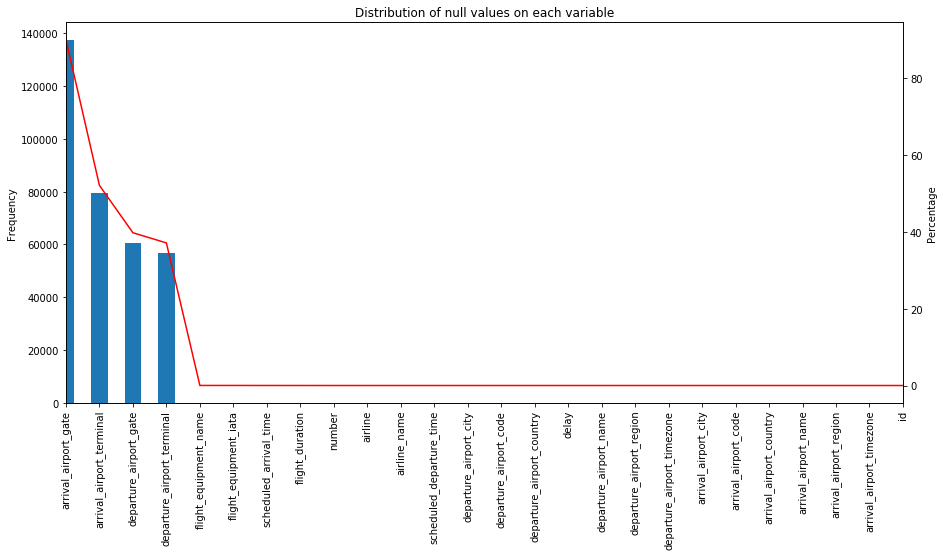

In [10]:
plt.figure(figsize = (15,7))
plt.title('Distribution of null values on each variable')
ax = flight_df.isnull().sum().sort_values(ascending = False).plot.bar()
ax.set_ylabel('Frequency')
ax.twinx()
ax1 = (flight_df.isnull().sum()/flight_df.isnull().count()*100).sort_values(ascending = False).plot.line(color = 'red')
ax1.set_ylabel('Percentage')
plt.show()

In [11]:
flight_df[['arrival_airport_gate','arrival_airport_terminal','departure_airport_gate','departure_airport_terminal']].head(3)

,arrival_airport_gate,arrival_airport_terminal,departure_airport_gate,departure_airport_terminal
0,2,NaN,J15,2
1,5,2,C33,M
2,5,2,C33,M


### Duplicate Entries

There is no **duplicated values** found in the dataset.

In [12]:
flight_df[flight_df.duplicated()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay


## Data Preparation

### Feature Engineering

#### Flight Duration (Actual)

There are two flight number without flight duration. By a little bit of googling, I found that:
* Flight Number VI1179 has duration 6h 51m in total (source can be found [here](https://flightaware.com/live/flight/VDA1179))
* Flight Number NZ6091 has duration 4h 14m in total (source can be found [here](https://uk.flightaware.com/live/flight/ANZ6091))

The flight date is different but to avoid removing the entries, one could assume the flight duration more or less the same.

In [13]:
flight_df.loc[flight_df['number'] == 'VI1179','flight_duration'] = '6h 51m'
flight_df.loc[flight_df['number'] == 'NZ6091','flight_duration'] = '4h 14m'

Making **a function to convert flight duration into minutes** using regular expression.

In [14]:
import re
def convert_to_minutes(data):
    dummy = data.split()
    if len(dummy) == 2:
        dummy[0] = int(re.findall(r'\d+', dummy[0])[0])
        dummy[1] = int(re.findall(r'\d+', dummy[1])[0])
        return dummy[0]*60 + dummy[1]
    elif 'h' in dummy[0]:
        dummy[0] = int(re.findall(r'\d+', dummy[0])[0])
        return dummy[0]*60
    else:
        return int(re.findall(r'\d+', dummy[0])[0])

In [15]:
flight_df['flight_duration_mod'] = flight_df['flight_duration'].apply(convert_to_minutes)

#### Scheduled & Arrival Time

Converting str type of variable into datetime variable to make the analysis easier for date time type of data.

In [16]:
from datetime import datetime
date_format = '%Y-%m-%d %H:%M:%S'
def convert_to_datetime(data):
    return datetime.strptime(data,date_format)

def convert_to_string(data):
    return datetime.strftime(data,date_format)

In [17]:
flight_df['scheduled_departure_time'] = flight_df['scheduled_departure_time'].apply(convert_to_datetime)

Converting non-null values of arrival time:

In [18]:
flight_df.loc[~flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'] = flight_df.loc[~flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'].apply(convert_to_datetime)

In [19]:
flight_df['scheduled_arrival_time'] = pd.to_datetime(flight_df['scheduled_arrival_time'])

I found null values on four flight numbers with five flight arrival schedules, those are:
* CX5691
* KA691
* VI1179
* NZ6091

Combining with the previous information (flight duration) and scheduled departure time **(assume the delay is due to the late departure, not because of late arrival)** then we can generate scheduled arrival time.

In [20]:
flight_df[flight_df['scheduled_arrival_time'].isnull()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_duration_mod
8167,8266,CX5691,CX,Cathay Pacific,2018-10-09 12:45:00,NaT,Kuala Lumpur,KUL,MY,C12,...,NaN,Penang International Airport,Asia,NaN,Asia/Kuala_Lumpur,333,Airbus A330-300,52m,32,52
8168,8267,KA691,KA,Cathay Dragon,2018-10-09 12:45:00,NaT,Kuala Lumpur,KUL,MY,C12,...,NaN,Penang International Airport,Asia,NaN,Asia/Kuala_Lumpur,333,Airbus A330-300,52m,32,52
38176,111993,VI1179,VI,Volga-Dnepr,2018-10-25 23:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,A.B. Won Pat International Airport,Oceania,NaN,Pacific/Guam,NaN,NaN,6h 51m,10,411
100795,426916,NZ6091,NZ,Air New Zealand,2018-11-26 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
100798,426919,NZ6091,NZ,Air New Zealand,2018-11-26 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
328,483577,NZ6091,NZ,Air New Zealand,2018-12-01 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
330,483579,NZ6091,NZ,Air New Zealand,2018-12-01 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254


In [21]:
from datetime import timedelta
def convert_to_timedelta(data):
    return timedelta(minutes = data)

In [22]:
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'] = \
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'scheduled_departure_time'] + \
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'flight_duration_mod'].apply(convert_to_timedelta)

In [23]:
flight_df[flight_df['scheduled_arrival_time'].isnull()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_duration_mod


#### Flight Duration (Scheduled)

From the current scheduled departure and arrival, I generate the **scheduled flight duration**.

In [24]:
def convert_to_minutes_from_timedelta(data):
    return data.seconds/60

In [25]:
flight_df['flight_duration_scheduled'] = (flight_df['scheduled_arrival_time'] - flight_df['scheduled_departure_time']).apply(convert_to_minutes_from_timedelta)

#### Delayed>60
Generating variable delayed > 60 minutes.

In [26]:
flight_df['delay>60'] = flight_df['delay'].apply(lambda x: 1 if x > 60 else 0)

#### Time Category

In [27]:
def convert_to_time_category(data):
    hour = data.hour
    if (hour >= 6) & (hour < 12):
        return 'morning'
    elif (hour >= 12) & (hour < 18):
        return 'afternoon'
    elif (hour >= 18) & (hour < 24):
        return 'evening'
    else:
        return 'midnight'

In [28]:
flight_df['flight_time_category'] = flight_df['scheduled_departure_time'].apply(convert_to_time_category)

#### Name Day of the Week

In [29]:
day_format = "%A"
def convert_to_day_of_week(data):
    return data.strftime(day_format)

In [30]:
flight_df['day_of_week'] = flight_df['scheduled_departure_time'].apply(convert_to_day_of_week)

#### Month Name

In [31]:
month_format = "%B"
def convert_to_month(data):
    return data.strftime(month_format)

In [32]:
flight_df['month_name'] = flight_df['scheduled_departure_time'].apply(convert_to_month)

#### Day of the Month

In [ ]:
day_format = "%d"
def convert_to_day(data):
    return data.strftime(day_format)

In [ ]:
flight_df['day'] = flight_df['scheduled_departure_time'].apply(convert_to_day)

## Exploratory Data Analysis
Here a lot of graphs will be built.

In [33]:
# updating numerical and categorical data
numerical = list(flight_df.dtypes[flight_df.dtypes != 'object'].index)
categorical = list(flight_df.dtypes[flight_df.dtypes == 'object'].index)

### Categorical

In [34]:
def cat_predictors_plotting(df, columns, target, plots_column = 3):
    counter = 1
    plots_row = len(columns)
    plt.figure(figsize = (15,35))
    for col in list(set(columns) - set(target)):
        dummy = df.groupby(by = [col, target]).size().reset_index()
        dummy = dummy.merge(df.groupby(by = col).size().reset_index(), how = 'left', on = col)
        dummy['pct'] = dummy['0_x']/dummy['0_y']
        dummy.sort_values(by = col, inplace = True)

        plt.subplot(plots_row,plots_column,counter)
        plt.title(col)
        ax = sns.countplot(x = col, data = df.sort_values(by = col), hue = target)
        plt.xticks(rotation = 90)
        ax.twinx()
        ax1 = sns.lineplot(x = col, y = 'pct', data = dummy[dummy[target] == 1], color = 'red')
        plt.xticks(rotation = 90)
        
        del dummy
        counter += 1
    plt.tight_layout()

In [35]:
cat_to_plot = list(set(categorical) - set(['departure_airport_timezone','departure_airport_region',\
                                           'departure_airport_country','departure_airport_name',\
                                           'departure_airport_terminal','departure_airport_gate','flight_equipment_name',\
                                           'arrival_airport_gate', 'arrival_airport_name','arrival_airport_city',\
                                           'arrival_airport_terminal','arrival_airport_timezone','arrival_airport_country',\
                                           'arrival_airport_code','flight_duration','number',\
                                           'scheduled_arrival_time','scheduled_departure_time','airline_name']))
cat_to_plot

['departure_airport_city',
 'flight_time_category',
 'month_name',
 'arrival_airport_region',
 'day_of_week',
 'departure_airport_code',
 'airline',
 'flight_equipment_iata']

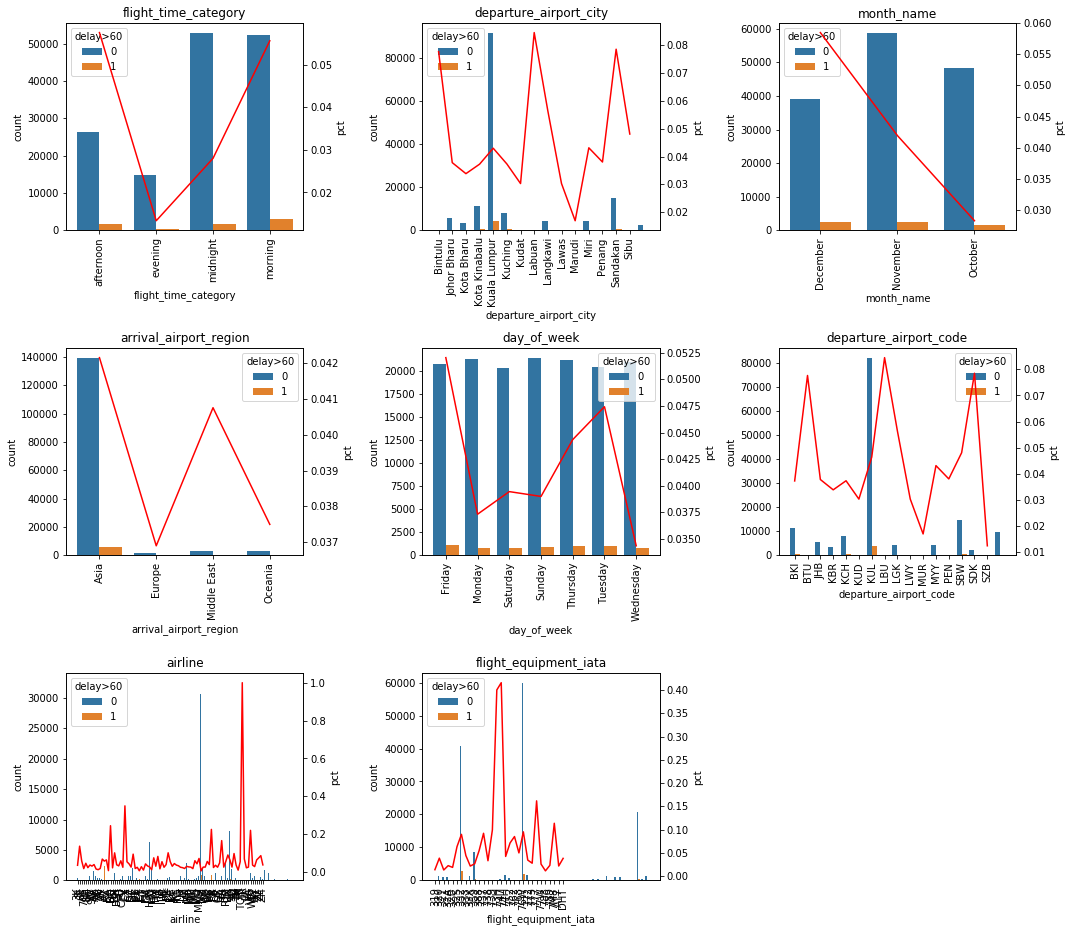

In [36]:
cat_predictors_plotting(flight_df, cat_to_plot, 'delay>60')

#### Detailed Analysis

In [37]:
from ipywidgets import interact

@interact
def interactive_analysis(cat = cat_to_plot, target = 'delay>60'):
    df = flight_df.copy()
    dummy = df.groupby(by = [cat, target]).size().reset_index()
    dummy = dummy.merge(df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
    dummy['pct'] = dummy['0_x']/dummy['0_y']
    dummy.sort_values(by = cat, inplace = True)
        
    plt.figure(figsize = (7,7))
    plt.title(cat)
    ax = sns.countplot(x = cat, data = df.sort_values(by = cat), hue = target)
    plt.xticks(rotation = 90)
    ax.twinx()
    ax1 = sns.lineplot(x = cat, y = 'pct', data = dummy[dummy[target] == 1], color = 'red')
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='cat', options=('departure_airport_city', 'flight_time_category', '…

##### Airlines

In [38]:
cat = 'airline'
target = 'delay>60'
df = flight_df.copy()
dummy = df.groupby(by = [cat, target]).size().reset_index()
dummy = dummy.merge(df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
dummy['pct'] = dummy['0_x']/dummy['0_y']
dummy.sort_values(by = cat, inplace = True)
to_plot = dummy.sort_values(by = ['0_y','0_x'], ascending = False).reset_index(drop = True).copy()

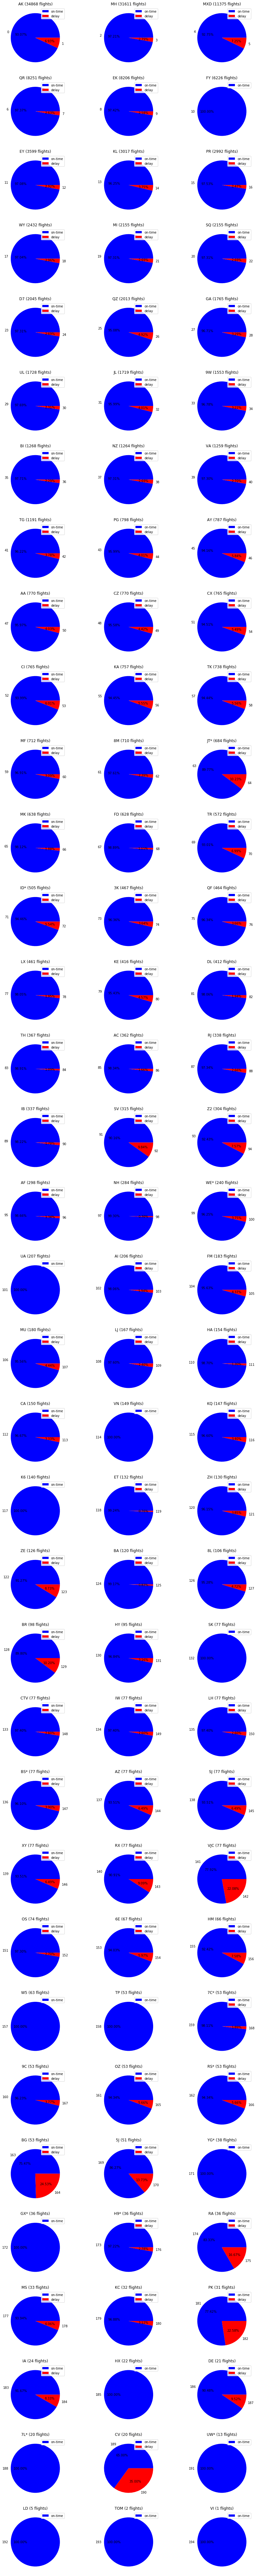

In [39]:
counter = 1
plots_column = 3
plots_row = len(list(to_plot['airline'].unique()))
plt.figure(figsize = (15,450))
for airline in list(to_plot['airline'].unique()):
    plt.subplot(plots_row,plots_column,counter)
    plt.title(airline + ' (' + str(to_plot.loc[to_plot['airline'] == airline,'0_y'].unique()[0]) + ' flights)')
    to_plot[to_plot['airline'] == airline]['0_x'].plot.pie(autopct = '%.2f%%', colors = ['b','r'])
    plt.ylabel(None)
    plt.xlabel(None)
    plt.legend(labels = ['on-time', 'delay'])
    counter += 1
plt.show()

##### Time Category

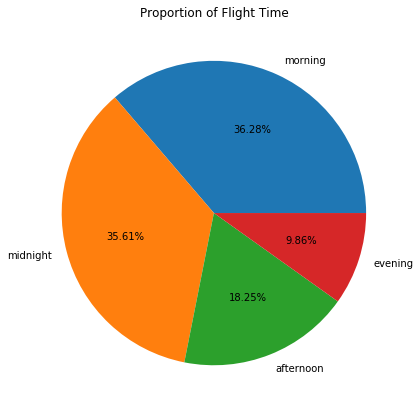

In [40]:
plt.figure(figsize = (7,7))
flight_df['flight_time_category'].value_counts().plot.pie(autopct = '%.2f%%')
plt.ylabel(None)
plt.title('Proportion of Flight Time')
plt.show()

#### Data Transformation

In [41]:
flight_df = pd.concat([flight_df,pd.get_dummies(flight_df[cat_to_plot])], axis = 1)

### Numerical

In [42]:
def plot_correlation_color(df, target):
    plt.figure(figsize = (7,7))
    plt.title('Correlation Values w.r.t Target')
    correlation = df.corr()[target].sort_values()
    limit = 0.1
    mask_red = (correlation > limit)
    mask_green = (correlation <= limit) & (correlation >= -limit)
    mask_blue = (correlation < -limit)
    plt.bar(correlation[mask_blue].index, correlation[mask_blue], color = 'blue')
    plt.bar(correlation[mask_green].index, correlation[mask_green], color = 'green')
    plt.bar(correlation[mask_red].index, correlation[mask_red], color = 'red')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation = 90)
    plt.show()

In [112]:
positive_corr = list(flight_df.corr()['delay'].sort_values(ascending = False)[3:13].index)

In [115]:
negative_corr = list(flight_df.corr()['delay'].sort_values(ascending = False)[-10:].index)

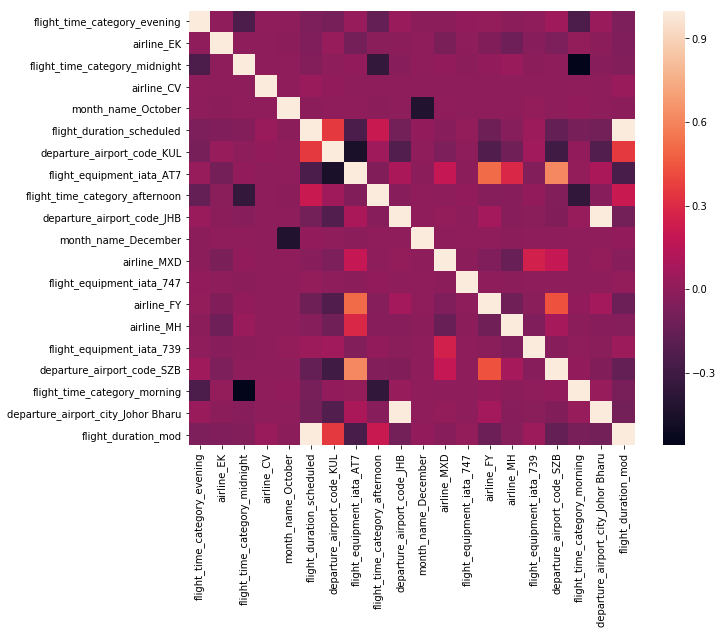

In [121]:
plt.figure(figsize = (10,8))
sns.heatmap(flight_df[list(set(positive_corr) | set(negative_corr))].corr())
plt.show()

In [126]:
flight_df[list(set(positive_corr) | set(negative_corr))].corr()

,flight_time_category_evening,airline_EK,flight_time_category_midnight,airline_CV,month_name_October,flight_duration_scheduled,departure_airport_code_KUL,flight_equipment_iata_AT7,flight_time_category_afternoon,departure_airport_code_JHB,month_name_December,airline_MXD,flight_equipment_iata_747,airline_FY,airline_MH,flight_equipment_iata_739,departure_airport_code_SZB,flight_time_category_morning,departure_airport_city_Johor Bharu,flight_duration_mod
flight_time_category_evening,1.000000,0.001645,-0.245972,0.005814,-0.005052,-0.062172,-0.087468,0.027743,-0.156278,0.040451,-0.014741,-0.010677,0.007250,0.017011,-0.013226,0.001498,0.053279,-0.249536,0.040451,-0.064299
airline_EK,0.001645,1.000000,-0.002814,-0.002729,-0.006409,-0.059380,0.027640,-0.095764,-0.019910,-0.009622,0.000695,-0.067645,-0.005355,-0.049157,-0.121830,-0.026770,-0.061726,0.017778,-0.009622,-0.057472
flight_time_category_midnight,-0.245972,-0.002814,1.000000,-0.002537,0.004182,-0.042382,-0.001972,0.010503,-0.351414,-0.028398,0.003670,0.011412,-0.010006,0.010220,0.042153,-0.010857,-0.004997,-0.561117,-0.028398,-0.044954
airline_CV,0.005814,-0.002729,-0.002537,1.000000,0.001813,0.037693,0.010066,-0.004599,-0.003928,-0.002290,-0.000573,-0.003249,-0.000257,-0.002361,-0.005851,-0.001286,-0.002964,0.002077,-0.002290,0.037973
month_name_October,-0.005052,-0.006409,0.004182,0.001813,1.000000,-0.016618,0.000011,0.000812,-0.012356,-0.002908,-0.425201,0.003683,-0.000676,-0.002003,-0.001877,0.014204,-0.001014,0.008894,-0.002908,-0.015568
flight_duration_scheduled,-0.062172,-0.059380,-0.042382,0.037693,-0.016618,1.000000,0.354722,-0.255844,0.209569,-0.099593,0.009015,-0.027406,0.016694,-0.127224,-0.034641,0.046795,-0.152680,-0.087606,-0.099593,0.997330
departure_airport_code_KUL,-0.087468,0.027640,-0.001972,0.010066,0.000011,0.354722,1.000000,-0.456272,0.059885,-0.227506,0.003324,-0.063614,-0.002605,-0.234346,-0.112992,0.062765,-0.294514,0.008088,-0.227506,0.356879
flight_equipment_iata_AT7,0.027743,-0.095764,0.010503,-0.004599,0.000812,-0.255844,-0.456272,1.000000,-0.050813,0.092963,-0.006344,0.192725,-0.009026,0.513032,0.292367,-0.045118,0.613731,0.013159,0.092963,-0.257126
flight_time_category_afternoon,-0.156278,-0.019910,-0.351414,-0.003928,-0.012356,0.209569,0.059885,-0.050813,1.000000,-0.027846,0.004879,-0.004660,0.010534,-0.033731,-0.027400,0.010099,-0.045051,-0.356505,-0.027846,0.208992
departure_airport_code_JHB,0.040451,-0.009622,-0.028398,-0.002290,-0.002908,-0.099593,-0.227506,0.092963,-0.027846,1.000000,0.001696,0.015353,-0.004494,0.071548,-0.026243,-0.022465,-0.051798,0.025572,1.000000,-0.101986


In [108]:
def num_predictors_plotting(df, target, plots_column = 2, kde = True, bins = 10):
    # preparation
    columns = list(df.corr()[target].sort_values()[:-1].index)
    columns = list(set(numerical) & set(columns))
    columns_values = list(df.corr()[target].sort_values()[:-1].values)
    columns_values = [round(x,3) for x in columns_values]
    
    # plotting
    counter = 1
    plots_row = len(columns)*2
    plt.figure(figsize = (15,50))
    for num, corr in zip(columns,columns_values):
        plt.subplot(plots_row, plots_column, counter)
        plt.title(num + ' (' + str(corr) + ')')
        df[num].plot.hist(bins)
        counter += 1
        
        if kde:
            plt.subplot(plots_row,plots_column,counter)
            plt.title(num + ' (KDE plot)')
            sns.kdeplot(df.loc[df[target] == 0,num])
            sns.kdeplot(df.loc[df[target] == 1,num])
            plt.legend(labels = [0,1])
            counter += 1

    plt.tight_layout()

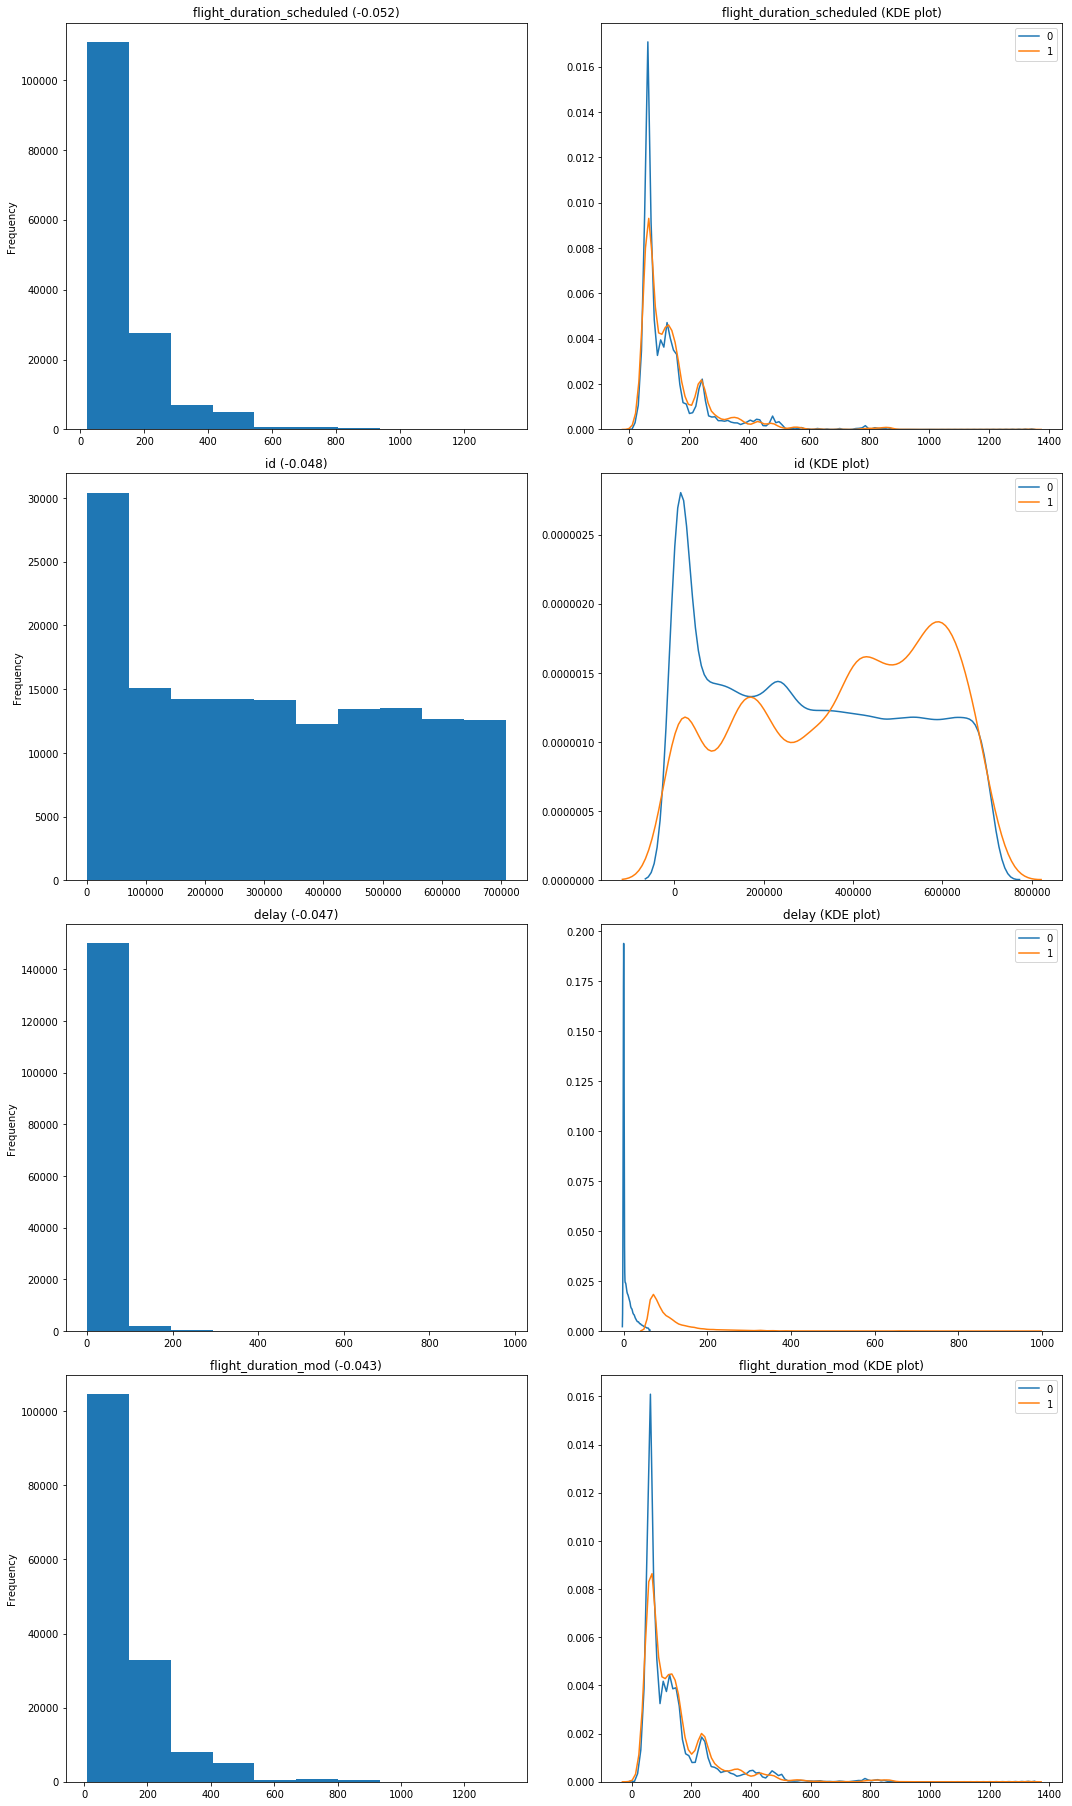

In [109]:
num_predictors_plotting(flight_df, 'delay>60')

#### Detailed Analysis

In [48]:
dummy = flight_df[['delay','delay>60']].reset_index(drop = True)

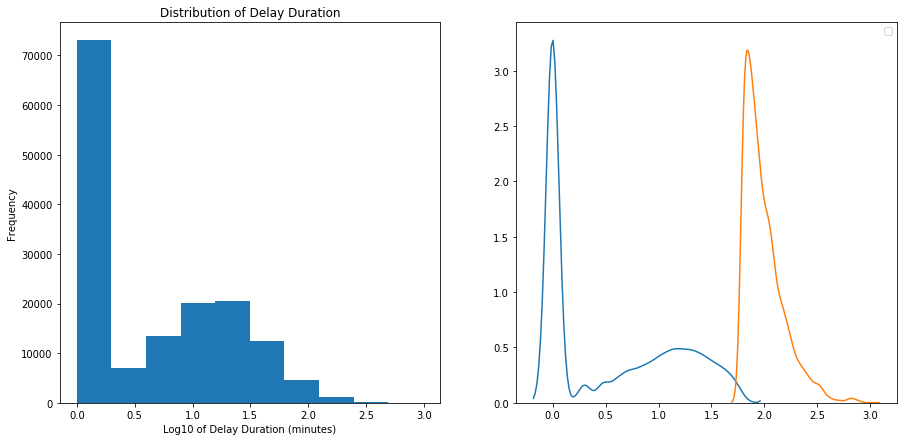

In [49]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
dummy['delay'].apply(lambda x: x if x == 0 else np.log10(x)).plot.hist()
plt.title('Distribution of Delay Duration')
plt.xlabel('Log10 of Delay Duration (minutes)')

plt.subplot(1,2,2)
sns.kdeplot(dummy.loc[dummy['delay>60'] == 0,'delay'].apply(lambda x: x if x == 0 else np.log10(x)))
sns.kdeplot(dummy.loc[dummy['delay>60'] == 1,'delay'].apply(lambda x: x if x == 0 else np.log10(x)))
plt.legend('')
plt.show()

## Modeling & Evaluation

### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lin_reg = LinearRegression()
lin_reg_selected = LinearRegression()

#### Training

In [86]:
col_to_train = list(set(flight_df.columns) - set(['id','flight_duration_mod','delay>60','delay','departure_airport_timezone','departure_airport_region',\
                                           'departure_airport_country','departure_airport_name',\
                                           'departure_airport_terminal','departure_airport_gate','flight_equipment_name',\
                                           'arrival_airport_gate', 'arrival_airport_name','arrival_airport_city',\
                                           'arrival_airport_terminal','arrival_airport_timezone','arrival_airport_country',\
                                           'arrival_airport_code','flight_duration','number',\
                                           'scheduled_arrival_time','scheduled_departure_time','airline_name']) \
                                           - set(cat_to_plot))

In [87]:
train_mask = (flight_df['month_name'] != 'December')
test_mask = (flight_df['month_name'] == 'December')

In [88]:
X_train = flight_df.loc[train_mask, col_to_train]
Y_train = flight_df.loc[train_mask,'delay']

#### Feature Selection

In [89]:
import statsmodels.api as sm

In [90]:
result = sm.OLS(Y_train,X_train).fit()

display(result.summary())

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delay   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     66.50
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:17:40   Log-Likelihood:            -5.1726e+05
No. Observations:              111068   AIC:                         1.035e+06
Df Residuals:                  110890   BIC:                         1.037e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
airline_CTV                             -7.7677      3.443     -2.256      0.024     -14.517      -1.019
flight_equipment_iata_752               51.6949     13.396      3.859      0.000      25.439      77.951
flight_equipment_iata_33Y              -13.6385     24.057     -0.567      0.571     -60.790      33.513
airline_ZH                               0.9462      2.745      0.345      0.730      -4.435       6.327
airline_JT*                              9.3239      1.353      6.891      0.000       6.672      11.976
airline_HY                             -10.5252      3.130     -3.363      0.001     -16.659      -4.391
airline_BI                             -10.4623      1.077     -9.714      0.000     -12.573      -8.351
flight_equipment_iata_789               -3.4107      6.167     -0.553      0.580     -15.498       8.677
airline_ZE                              -8.4376      2.764     -3.052      0.002     -13.856      -3.020
airline_IB                              -6.2468      1.943     -3.215      0.001     -10.055      -2.438
airline_AA                              -4.2104      1.289     -3.266      0.001      -6.737      -1.684
departure_airport_city_Langkawi         -0.4790      0.459     -1.044      0.296      -1.378       0.420
airline_MI                              -4.0553      0.899     -4.510      0.000      -5.818      -2.293
airline_BG                              32.6090      4.326      7.537      0.000      24.129      41.089
airline_EY                             -10.6971      0.805    -13.292      0.000     -12.274      -9.120
flight_equipment_iata_333                9.8913      6.038      1.638      0.101      -1.942      21.725
departure_airport_code_BKI              -1.7465      0.430     -4.062      0.000      -2.589      -0.904
airline_MU                              -3.9262      2.376     -1.653      0.098      -8.582       0.730
flight_equipment_iata_DHT               10.5118      6.088      1.727      0.084      -1.421      22.445
airline_JL                              -6.6995      0.960     -6.980      0.000      -8.581      -4.818
airline_OS                             -11.9507      3.661     -3.265      0.001     -19.126      -4.776
airline_LX                              -4.8016      1.526     -3.146      0.002      -7.794      -1.810
departure_airport_city_Kuala Lumpur     -1.8682      0.552     -3.383      0.001      -2.951      -0.786
airline_DL                              -6.2069      1.668     -3.720      0.000      -9.477      -2.937
airline_FD                             -10.8547      1.391     -7.802      0.000     -13.582      -8.128
airline_Z2                              13.8335      1.906      7.257      0.000      10.098      17.569
departure_airport_city_Johor Bharu    

In [91]:
good_predictors = list(result.pvalues[result.pvalues < 0.05].index)

In [92]:
X_train_selected = X_train[good_predictors]

#### Model Fit

In [93]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
lin_reg_selected.fit(X_train_selected,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Evaluation

In [95]:
X_test = flight_df.loc[test_mask,col_to_train]
Y_test = flight_df.loc[test_mask,'delay']

In [96]:
X_test_selected = X_test[good_predictors]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


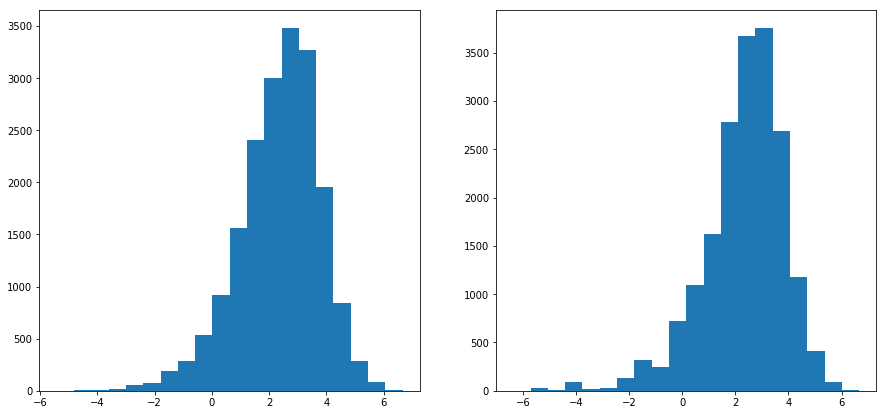

In [97]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.hist(np.log(Y_test - lin_reg.predict(X_test)), bins = 20)

plt.subplot(1,2,2)
plt.hist(np.log(Y_test - lin_reg_selected.predict(X_test_selected)), bins = 20)
plt.show()

### Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

### XGBoost

## Conclusion